# Linear SVM

Creates decision boundaries maximising distance to training data observations of different classes - large margin classification


- Only those observations that 'support'/ are on the margins affect boundaries. 
- These decision boundares are termed the **support vectors**
- Therefore, adding more training data away from the margins around the decision boundary do not affect the decision boundaries.

SVMs are senitive to scale, so data needs to be standardised.

## soft margins

hard margins - only suitable with linearly sepearable data, sensitive to outliers.

Soft margins aims to make the street (distance between margins) as large as possible, whilst minimising the number of violations (miss-classifications)

sklearn uses C to control the street size/violations trade off, low C means more violations and wider streets while high C means fewer violations and more streets.


In [1]:
import numpy as np

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris["data"]
y = iris["target"].astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [4]:
svm_pipe = Pipeline([("scaler", StandardScaler()),
                     ("linear_svc", LinearSVC(C=1, loss="hinge"))
                    ])

In [5]:
from yellowbrick.classifier import ClassificationReport

In [6]:
svm_report = ClassificationReport(svm_pipe, 
                                  classes=iris.target_names)

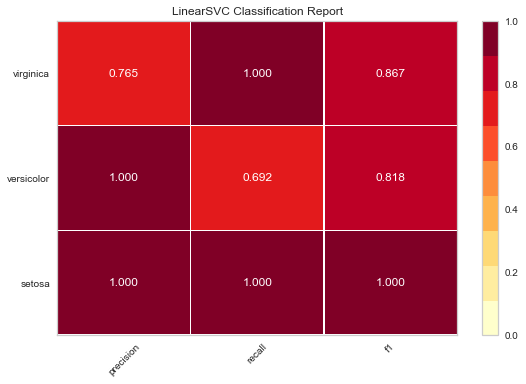

In [7]:
svm_report.fit(X_train, y_train)
svm_report.score(X_test, y_test)
g=svm_report.poof()

In [8]:
from yellowbrick.classifier import ConfusionMatrix

In [9]:
svm_matrix = ConfusionMatrix(svm_pipe,
                             classes = iris.target_names,
                             label_encoder={0: 'setosa',
                                            1: 'versicolor',
                                            2: 'virginica'
                                           }
                            )

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/metrics/classification.py:182: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


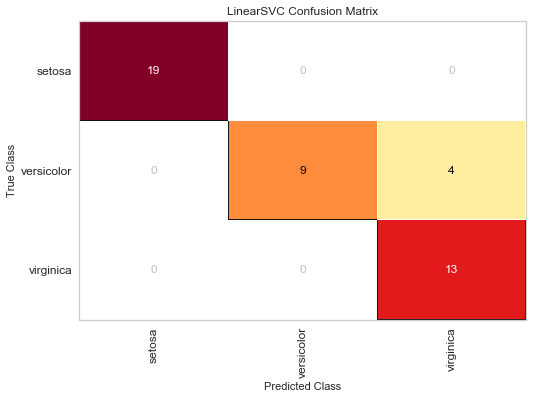

In [10]:
svm_matrix.fit(X_train, y_train)
svm_matrix.score(X_test, y_test)

svm_matrix.poof()

so the model misktakes a few versicolor for virginica irises

## Non-linear SVM classification

Many datasets are not linearly seperable, for this we can add non-linear, polynomical features to the dataset.

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly_svm_pipe = Pipeline([("poly_features", PolynomialFeatures(degree=3)),
                          ("scaler", StandardScaler()),
                          ("svm_clf", LinearSVC(C=10, loss="hinge"))
                         ])

In [13]:
X,y = datasets.make_moons(noise=0.2)

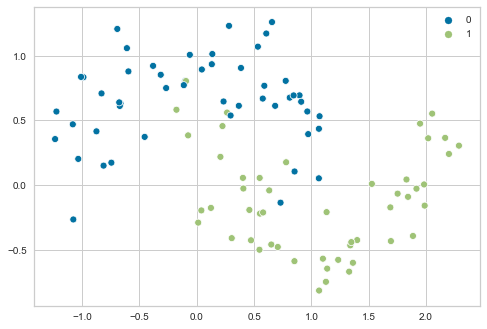

In [14]:
sns.scatterplot(X[:,0],X[:,1], hue=y
               )

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


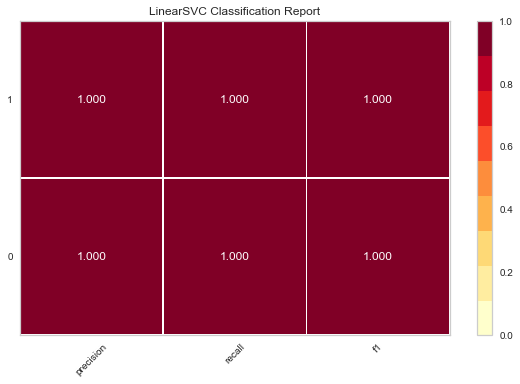

In [16]:
poly_svm_report = ClassificationReport(poly_svm_pipe,
                                       classes = np.unique(y)
                                      )
poly_svm_report.fit(X_train,
                    y_train)

poly_svm_report.score(X_test,
                      y_test)

poly_svm_report.poof()

Well, that worked

## Adding similarity features

Features are added using a similarity function. We can use the gaussian radial bias function (RBF)

$$\phi_\gamma(x,\ell) = e(-\gamma \| x-\ell \|^2)$$

This creates a gaussian peaking at a landmark x. We can create a RBF feature for each observation in the dataset. Though this does greatly expand the size of the dataset.

In [17]:
from sklearn.svm import SVC

In [18]:
rbf_kernel_svm_pipe = Pipeline([("scaler", StandardScaler()),
                               ("svm", SVC(kernel="rbf",
                                           gamma=5,
                                           C=1
                                          ))
                              ])

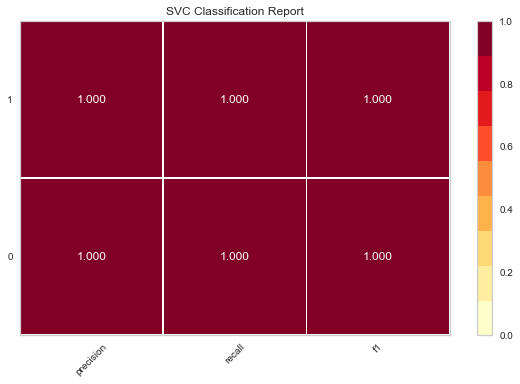

In [19]:
poly_svm_report = ClassificationReport(rbf_kernel_svm_pipe,
                                       classes = np.unique(y)
                                      )
poly_svm_report.fit(X_train,
                    y_train)

poly_svm_report.score(X_test,
                      y_test)

poly_svm_report.poof()

there are a number of other kernels, of the ones here a rule of thumb...

- Linear Kernel - linearly seperable
- Polynomial - nonlinearly seperable
- RBF - 'clustery'
- others for more special cases, e.g text data

try and use linear kernels first, then increase in complexity.

## Computational complexity of SVC

A downside of SVC is that they scale poorly with number of observations so work best with small and medium datasets as it scales well with number of features, but not number of observations

## Testing SVCs with different datasets

In [21]:
from sklearn.datasets import make_blobs

In [38]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


In [ ]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [22]:
X_linear, y_linear = make_blobs(n_samples=500,
                                n_features=2,
                                centers=2,
                                cluster_std=1.6,
                                random_state=42)

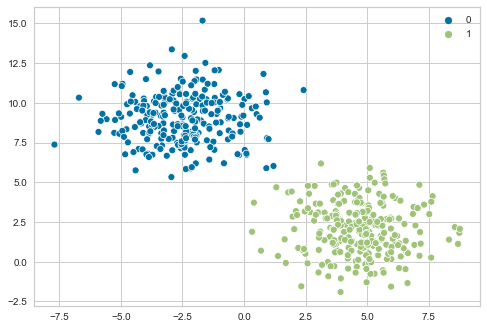

In [23]:
sns.scatterplot(X_linear[:,0],
                X_linear[:,1],
                hue=y_linear)

In [24]:
svm_linear_pipe = Pipeline([("scaler", StandardScaler()),
                            ("linear_svc", LinearSVC(loss="hinge"))
                           ])

svm_linear_params = {"linear_svc_C":[0.001, 0.01,0.1,1,10,100,1000]}

In [58]:
X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(X_linear,
                                                    y_linear,
                                                    test_size=0.3,
                                                    random_state=42)

In [59]:
svm_linear_report = ClassificationReport(svm_linear_pipe, 
                                  classes=np.unique(y_linear))

In [60]:
from yellowbrick.model_selection import ValidationCurve

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


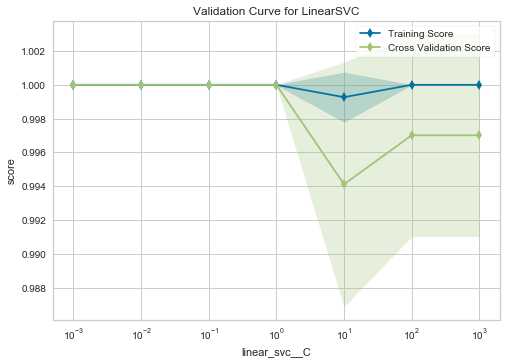

In [90]:
svm_linear_curve = ValidationCurve(svm_linear_pipe,
                                   param_name='linear_svc__C',
                                   param_range=[0.001, 0.01,0.1,1,10,100,1000],
                                   cv=5,
                                  logx=True,
                                  scoring="f1")

svm_linear_curve.fit(X_linear_train, y_linear_train)
svm_linear_curve.poof()

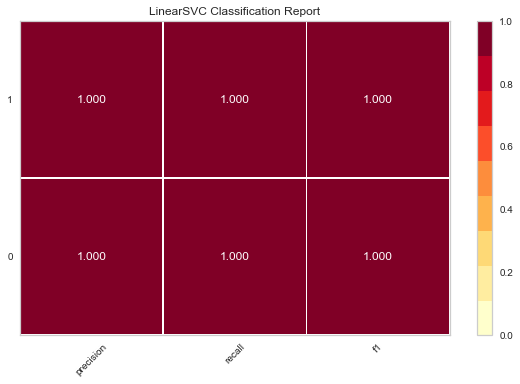

In [62]:
svm_linear_report.fit(X_train, y_train)
svm_linear_report.score(X_test, y_test)
g=svm_linear_report.poof()

In [63]:
from yellowbrick.classifier import ROCAUC

In [64]:
svm_linear_roc = ROCAUC(svm_linear_pipe, 
                        classes=np.unique(y_linear),
                        per_class=False,
                        micro=False,
                        macro=False)

In [65]:
svm_linear_pipe.fit(X_linear_train, y_linear_train)

y_predicted = svm_linear_pipe.predict(X_linear_test)

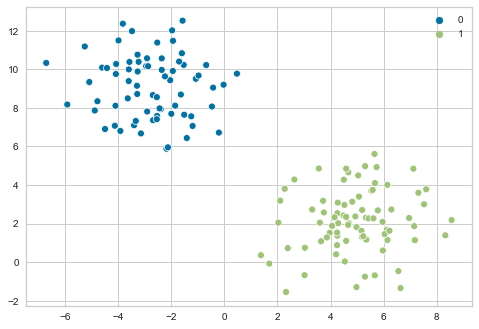

In [66]:
sns.scatterplot(X_linear_test[:,0],
                X_linear_test[:,1], 
                hue=y_predicted, 
                style=[(predicted==actual).astype(int)
 for predicted, actual in zip(y_predicted, y_linear_test)])

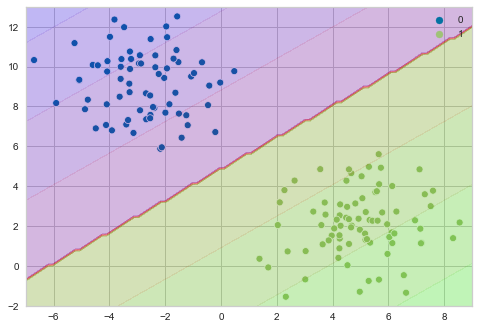

In [67]:
sns.scatterplot(X_linear_test[:,0],
                X_linear_test[:,1],
                hue=y_linear_test)
plot_predictions(svm_linear_pipe, [np.floor(X_linear_test[:,0].min()), 
                                   np.ceil(X_linear_test[:,0].max()), 
                                   np.floor(X_linear_test[:,1].min()),
                                   np.ceil(X_linear_test[:,1].max())])

In [68]:
np.ceil(X_linear[:,0].max())

9.0

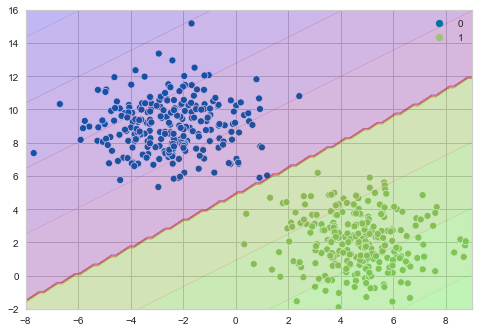

In [69]:
sns.scatterplot(X_linear[:,0],
                X_linear[:,1],
                hue=y_linear)
plot_predictions(svm_linear_pipe, [np.floor(X_linear[:,0].min()), 
                                   np.ceil(X_linear[:,0].max()), 
                                   np.floor(X_linear[:,1].min()),
                                   np.ceil(X_linear[:,1].max())])

good, this works well with linear kernel, to be expected really

lets see how the linear SVC gets on with this...

In [72]:
from sklearn.datasets import make_moons

In [86]:
X_moon, y_moon = make_moons(n_samples=500,
                            noise =0.20)

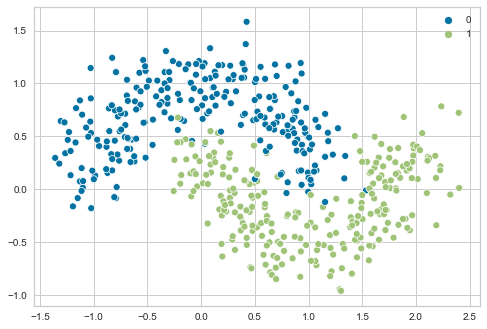

In [87]:
sns.scatterplot(X_moon[:,0],
               X_moon[:,1],
               hue = y_moon)

In [89]:
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
                                                                X_moon,
                                                                y_moon,
                                                                test_size=0.3,
                                                                random_state=42
)

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/edd/.local/sha

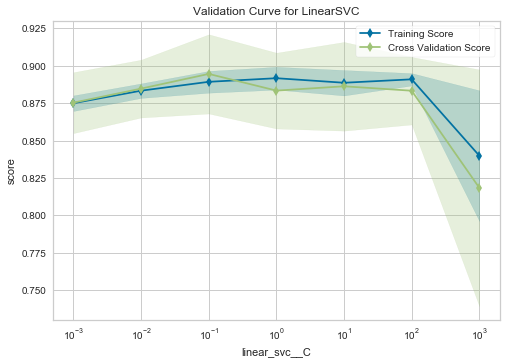

In [96]:
svm_moon_curve = ValidationCurve(svm_linear_pipe,
                                   param_name='linear_svc__C',
                                   param_range=[0.001, 0.01,0.1,1,10,100,1000],
                                   cv=5,
                                  logx=True,
                                  scoring="f1")
svm_moon_curve.fit(X_moon_train, y_moon_train)
svm_moon_curve.poof()

In [97]:
svm_linear_pipe = Pipeline([("scaler", StandardScaler()),
                            ("linear_svc", LinearSVC(loss="hinge",C=0.1))
                           ])

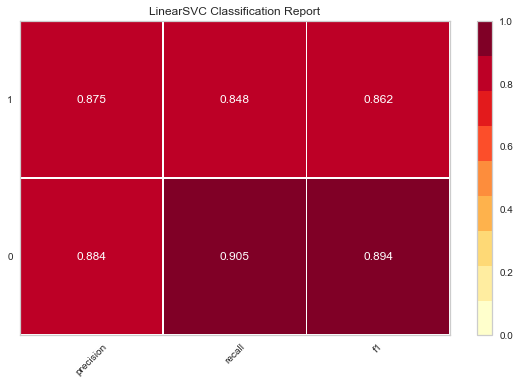

In [98]:
svm_linear_report = ClassificationReport(svm_linear_pipe, 
                                  classes=np.unique(y_linear))

svm_linear_report.fit(X_moon_train, y_moon_train)
svm_linear_report.score(X_moon_test, y_moon_test)
svm_linear_report.poof()

not terrible, but not as good as before

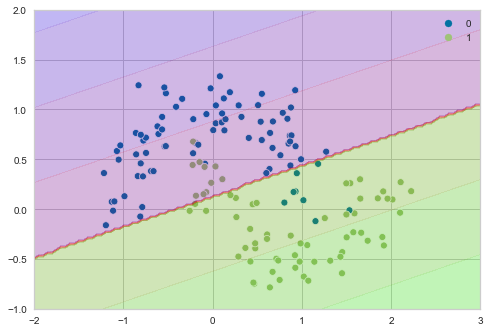

In [100]:
sns.scatterplot(X_moon_test[:,0],
                X_moon_test[:,1],
                hue=y_moon_test)
plot_predictions(svm_linear_pipe, [np.floor(X_moon_test[:,0].min()), 
                                   np.ceil(X_moon_test[:,0].max()), 
                                   np.floor(X_moon_test[:,1].min()),
                                   np.ceil(X_moon_test[:,1].max())])

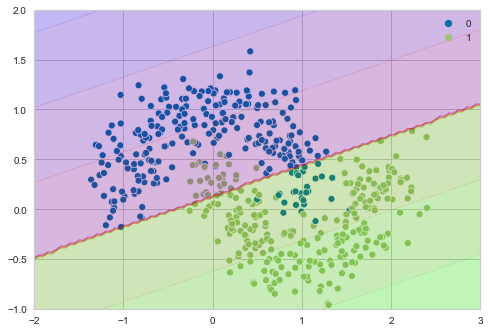

In [102]:
sns.scatterplot(X_moon[:,0],
                X_moon[:,1],
                hue=y_moon)
plot_predictions(svm_linear_pipe, [np.floor(X_moon[:,0].min()), 
                                   np.ceil(X_moon[:,0].max()), 
                                   np.floor(X_moon[:,1].min()),
                                   np.ceil(X_moon[:,1].max())])

it does ok at this, but we can see a bunch of observations that are miss classified